## DATA IMPORT FROM GOOGLE DRIVE

In [60]:
import pandas as pd
df=pd.read_csv("https://drive.google.com/uc?export=download&id=1Dyt6laIWQNO4p6FHyw335QG8rKLyeXP1")
# df[df['Symbol']=='KOTAKBANK']
symbol='HAL'
instrument_key=df[df['Symbol']==symbol]['instrument_key'].values[0]
df_only_options_stock=pd.read_excel("https://drive.google.com/uc?export=download&id=1-_aBkcgF1W9LNUJbpE4rUGlMst4iiaWo")
print(df_only_options_stock)


         Symbol  Applicable Step value  \
0      AARTIIND                    5.0   
1           ABB                   50.0   
2    ABBOTINDIA                  250.0   
3     ABCAPITAL                    2.5   
4         ABFRL                    2.5   
..          ...                    ...   
179        VEDL                    2.5   
180      VOLTAS                   10.0   
181       WIPRO                    2.5   
182        ZEEL                    2.5   
183   ZYDUSLIFE                    5.0   

    No. of Strikes Provided\nIn the money - At the money - Out of the money  \
0                                          16 - 1 - 16                        
1                                          13 - 1 - 13                        
2                                          14 - 1 - 14                        
3                                          11 - 1 - 11                        
4                                          13 - 1 - 13                        
..                   

## IMPPORTING HISTORICAL DATA FOR STOCKS

In [61]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
# data=yf.download(tickers='HAL.NS',period='max',interval='1d')
# historical_stock_data=data['Adj Close']

## AUTHENTICATION

In [63]:
import urllib.parse
import pandas as pd
import requests

apikey='7112261b-c8d0-4e6b-b9cc-7fd1e5c56752'
secretkey='xoxzuh2k62'
rurl=urllib.parse.quote('https://127.0.0.1:5000/',safe="")



In [64]:
uri=f'https://api.upstox.com/v2/login/authorization/dialog?response_type=code&client_id=7112261b-c8d0-4e6b-b9cc-7fd1e5c56752&redirect_uri=https://127.0.0.1:5000/&state=RnJpIERlYyAxNiAyMDIyIDE1OjU4OjUxIEdNVCswNTMwIChJbmRpYSBTdGFuZGFyZCBUaW1lKQ%3D%3D'
uri


'https://api.upstox.com/v2/login/authorization/dialog?response_type=code&client_id=7112261b-c8d0-4e6b-b9cc-7fd1e5c56752&redirect_uri=https://127.0.0.1:5000/&state=RnJpIERlYyAxNiAyMDIyIDE1OjU4OjUxIEdNVCswNTMwIChJbmRpYSBTdGFuZGFyZCBUaW1lKQ%3D%3D'

In [65]:
code='36Mhj9'

In [66]:
import requests
import pandas as pd

url = 'https://api.upstox.com/v2/login/authorization/token'
headers = {
    'accept': 'application/json',
    'Content-Type': 'application/x-www-form-urlencoded',
}

data = {
    'code': code,
    'client_id': apikey,
    'client_secret': secretkey,
    'redirect_uri': 'https://127.0.0.1:5000/',
    'grant_type': 'authorization_code',
}

response = requests.post(url, headers=headers, data=data)

# Check the response status
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()

    # Convert to DataFrame
    df_token = pd.DataFrame(data.items(), columns=['Key', 'Value'])

    # Print the DataFrame
    print(df_token)

else:
    # Print an error message if the request was not successful
    print(f"Error: {response.status_code} - {response.text}")

# Alternatively, you can use loc
access_token_value = df_token.loc[df_token['Key'] == 'access_token', 'Value'].iloc[0]

# Print the access_token value
print("Access Token:", access_token_value)


               Key                                              Value
0            email                             iit2022231@iiita.ac.in
1        exchanges                     [NSE, BSE, CDS, NFO, BFO, BCD]
2         products                                    [OCO, D, CO, I]
3           broker                                             UPSTOX
4          user_id                                             58AUGK
5        user_name                               LAXMI NARAYAN SHARMA
6      order_types                          [MARKET, LIMIT, SL, SL-M]
7        user_type                                         individual
8              poa                                              False
9        is_active                                               True
10    access_token  eyJ0eXAiOiJKV1QiLCJrZXlfaWQiOiJza192MS4wIiwiYW...
11  extended_token                                               None
Access Token: eyJ0eXAiOiJKV1QiLCJrZXlfaWQiOiJza192MS4wIiwiYWxnIjoiSFMyNTYifQ.eyJzdWIiOiI1O

## LTP FETCHING

In [67]:
import requests
import json

def get_last_traded_price(access_token_value,instrument_key,symbol):
    ltp=-1
    url = f'https://api.upstox.com/v2/market-quote/ltp?instrument_key={instrument_key}'
    headers = {
        'Accept': 'application/json',
        'Authorization': f'Bearer {access_token_value}'
    }


    # Make the HTTP GET request
    response = requests.get(url, headers=headers)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the JSON response
        response_data = response.json()


        for key in response_data['data']:
          ltp = response_data['data'][key]['last_price']


        # Return the LTP

        return ltp
    else:
        # Print an error message if the request was not successful
        print(f"Failed to fetch data. Status code: {response.status_code}")
        return None


## USING GET LTP FUNCTION

In [68]:
# my_rej_list=[]
# my_succ_list=[]

# for i in range(len(df)):
#   ltp=get_last_traded_price(access_token_value,df.iloc[i,-1],df.iloc[i,2])
#   print(ltp)
#   if ltp==-1:
#     my_rej_list.append(df.iloc[i,2])
#   else:
#     my_succ_list.append([df.iloc[i,2],ltp])

# ltp_df=pd.DataFrame(my_succ_list,columns=['symbol','ltp'])
# my_rej_list
# print(len(my_succ_list),len(my_rej_list),len(df))
# print(my_rej_list)

## FETCHING OPTION CHAIN  DATA

In [71]:
import requests
def import_option_chain_data(instrument_key,access_token_value):
  url = 'https://api.upstox.com/v2/option/chain'
  params = {
      'instrument_key': instrument_key,
      'expiry_date': '2024-08-29'
  }
  headers = {
      'Accept': 'application/json',
      'Authorization': f'Bearer {access_token_value}'
  }

  response = requests.get(url, params=params, headers=headers)
  # Process the response data as needed
  data=response.json()
  print(response.json())
  return data


In [72]:
# data=import_option_chain_data(instrument_key,access_token_value)

In [76]:
def format_option_chain_data_into_dataframe(data):
  # Extract general data
  general_data = []
  call_data = []
  put_data = []

  for item in data['data']:
      general_info = {
          'expiry': item.get('expiry'),
          'strike_price': item.get('strike_price'),
          'underlying_key': item.get('underlying_key'),
          'underlying_spot_price': item.get('underlying_spot_price'),
          'pcr': item.get('pcr')
      }
      general_data.append(general_info)

      if 'call_options' in item:
          call_option = item['call_options']
          call_data.append({
              'expiry': item['expiry'],
              'strike_price': item['strike_price'],
              'instrument_key': call_option['instrument_key'],
              'ltp': call_option['market_data']['ltp'],
              'volume': call_option['market_data']['volume'],
              'oi': call_option['market_data']['oi'],
              'close_price': call_option['market_data']['close_price'],
              'bid_price': call_option['market_data']['bid_price'],
              'bid_qty': call_option['market_data']['bid_qty'],
              'ask_price': call_option['market_data']['ask_price'],
              'ask_qty': call_option['market_data']['ask_qty'],
              'prev_oi': call_option['market_data']['prev_oi'],
              'vega': call_option['option_greeks']['vega'],
              'theta': call_option['option_greeks']['theta'],
              'gamma': call_option['option_greeks']['gamma'],
              'delta': call_option['option_greeks']['delta'],
              'iv': call_option['option_greeks']['iv']
          })

      if 'put_options' in item:
          put_option = item['put_options']
          put_data.append({
              'expiry': item['expiry'],
              'strike_price': item['strike_price'],
              'instrument_key': put_option['instrument_key'],
              'ltp': put_option['market_data']['ltp'],
              'volume': put_option['market_data']['volume'],
              'oi': put_option['market_data']['oi'],
              'close_price': put_option['market_data']['close_price'],
              'bid_price': put_option['market_data']['bid_price'],
              'bid_qty': put_option['market_data']['bid_qty'],
              'ask_price': put_option['market_data']['ask_price'],
              'ask_qty': put_option['market_data']['ask_qty'],
              'prev_oi': put_option['market_data']['prev_oi'],
              'vega': put_option['option_greeks']['vega'],
              'theta': put_option['option_greeks']['theta'],
              'gamma': put_option['option_greeks']['gamma'],
              'delta': put_option['option_greeks']['delta'],
              'iv': put_option['option_greeks']['iv']
          })

  # Convert lists to DataFrames
  df_general = pd.DataFrame(general_data)
  df_call = pd.DataFrame(call_data)
  df_put = pd.DataFrame(put_data)

  # Display the DataFrames
  # print("General Data DataFrame:")
  # print(df_general)

  # print("\nCall Options DataFrame:")
  # print(df_call)

  # print("\nPut Options DataFrame:")
  # print(df_put)
  return df_call,df_general



In [74]:
df_call=format_option_chain_data_into_dataframe(data)

General Data DataFrame:
        expiry  strike_price       underlying_key  underlying_spot_price  \
0   2024-08-29        3800.0  NSE_EQ|INE066F01020                 4708.9   
1   2024-08-29        4000.0  NSE_EQ|INE066F01020                 4708.9   
2   2024-08-29        4100.0  NSE_EQ|INE066F01020                 4708.9   
3   2024-08-29        4200.0  NSE_EQ|INE066F01020                 4708.9   
4   2024-08-29        4300.0  NSE_EQ|INE066F01020                 4708.9   
5   2024-08-29        4400.0  NSE_EQ|INE066F01020                 4708.9   
6   2024-08-29        4500.0  NSE_EQ|INE066F01020                 4708.9   
7   2024-08-29        4600.0  NSE_EQ|INE066F01020                 4708.9   
8   2024-08-29        4700.0  NSE_EQ|INE066F01020                 4708.9   
9   2024-08-29        4800.0  NSE_EQ|INE066F01020                 4708.9   
10  2024-08-29        4900.0  NSE_EQ|INE066F01020                 4708.9   
11  2024-08-29        5000.0  NSE_EQ|INE066F01020               

## EXTRACTING ONLY LTP AND STRIKES

In [ ]:
def extrcting_only_ltp_and_strikes(df_call):
  new_data_frame=df_call.iloc[:,[1,3]]
  new_data_frame.drop(index=0,inplace=True)
  new_data_frame.reset_index(drop=True,inplace=True)
  my_strike_list=new_data_frame['strike_price'].tolist()
  print(new_data_frame)
  return my_strike_list,new_data_frame

In [ ]:
my_strike_list,new_data_frame=extrcting_only_ltp_and_strikes(df_call)

    strike_price     ltp
0         4000.0  747.00
1         4100.0  560.45
2         4200.0  571.45
3         4300.0  467.70
4         4400.0  385.65
5         4500.0  313.70
6         4600.0  249.00
7         4700.0  194.90
8         4800.0  148.50
9         4900.0  112.90
10        5000.0   84.60
11        5100.0   63.40
12        5200.0   47.00
13        5300.0   35.55
14        5400.0   27.30
15        5500.0   21.35
16        5600.0   18.00
17        5700.0   14.20
18        5800.0   11.65
19        5900.0   10.15
20        6000.0    9.00
21        6200.0    5.95
22        6400.0    5.65


<ipython-input-44-516a6672dd56>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_frame.drop(index=0,inplace=True)


## CALCULATING ALL POSSIBLE SPREAD AND MAX_LOSS and RISK TO REWARD RATIO

In [ ]:

def calculate_all_possible_spread_and_max_loss(new_data_frame,my_strike_list):

  #calculation of all_max_loss_possible (it iis 2d array bw all ltp)
  my_outer_list=[]
  my_outer_list_spread=[]
  for i in range(len(new_data_frame)):
    my_list=[]
    for j in range(len(new_data_frame)):
      my_list.append(new_data_frame.iloc[i,1]-new_data_frame.iloc[j,1])

    my_outer_list.append(my_list)

   #calculate all_possible_spreads (it iis 2d array bw all striikes)

  for i in range(len(new_data_frame)):
    my_list_2=[]
    for j in range(len(new_data_frame)):
      my_list_2.append(new_data_frame.iloc[i,0]-new_data_frame.iloc[j,0])

    my_outer_list_spread.append(my_list_2)

  df_max_loss=pd.DataFrame(my_outer_list)
  df_spread=pd.DataFrame(my_outer_list_spread)

  # print(df_spread,df_max_loss)

  #calculating risk reward ratio
  df_risk_reward=(-df_spread-df_max_loss)/df_max_loss
  # retaining only unique risk reward ratios

  # print(df_risk_reward)
  # df_risk_reward=df_risk_reward.unstack().sort_values(ascending=False).dropna().drop_duplicates()
  df_risk_reward=df_risk_reward.unstack().sort_values(ascending=False).dropna()
  # print(df_risk_reward)




  #finding max_loss and max_profit corresponding to strikes in df_risk_reward
  my_loss_listt=[]
  my_max_profit_list=[]
  for i in range(len(df_risk_reward)):
    my_loss_listt.append(df_max_loss.iloc[df_risk_reward.index[i][1],df_risk_reward.index[i][0]])
    my_max_profit_list.append(-df_spread.iloc[df_risk_reward.index[i][1],df_risk_reward.index[i][0]]-df_max_loss.iloc[df_risk_reward.index[i][1],df_risk_reward.index[i][0]])

  df_risk_reward=pd.DataFrame(df_risk_reward)
  df_risk_reward['loss']=my_loss_listt
  df_risk_reward['profit']=my_max_profit_list

  #retaining only positive losses and positive risk reward ratios
  df_risk_reward=df_risk_reward[df_risk_reward['loss']>0 ]
  # print(len(df_risk_reward))
  # print(df_risk_reward[df_risk_reward[0]<=0 ])
  df_risk_reward=df_risk_reward[df_risk_reward[0]>0 ]
  # print(len(df_risk_reward))
  # extracting only those strikes retaind corresponding to df_risk_reward
  strike_1=[]
  strike_2=[]

  for i in range(len(df_risk_reward)):
    strike_1.append(my_strike_list[df_risk_reward.index[i][0]])
    strike_2.append(my_strike_list[df_risk_reward.index[i][1]])
  df_risk_reward['strike_1']=strike_1
  df_risk_reward['strike_2']=strike_2
  df_risk_reward.columns=['reward','loss','profit','strike_1','strike_2']
  df_risk_reward.reset_index(drop=True)
  df_risk_reward.index
  return df_risk_reward
  # my_strike_list


In [ ]:
# df_risk_reward=calculate_all_possible_spread_and_max_loss(new_data_frame,my_strike_list)
# from google.colab import sheets
# sheet = sheets.InteractiveSheet(df=df_risk_reward)

## CALCULATING VOLATILTY AND PREDICTING PRICE RANGE OVER A TIME PERIOD

In [23]:
def cal_ploting_mean_std_returns(historical_stock_data):
  req_data=pd.DataFrame(historical_stock_data)
  req_data.reset_index(inplace=True)


  per_change=[None]


  for i in range(1,len(req_data)):
    change=((req_data.iloc[i,1]-req_data.iloc[i-1,1])/req_data.iloc[i-1,1])*100
    per_change.append(change)


  req_data['%change']=per_change

  req_data=req_data.drop(index=0)

  req_data
  mean=req_data['%change'].mean()
  std=req_data['%change'].std()
  print(f'mean % chaneg is {mean}, and std dev is{std}')

  # plt.figure(figsize=(10,5))
  # sns.histplot(req_data['%change'],kde=True)
  # plt.axvline(mean,color='r',linestyle='--')
  # plt.axvline(mean+std,color='g',linestyle='--')
  # plt.axvline(mean-std,color='g',linestyle='--')
  # plt.show()
  return mean,std,req_data



In [24]:

# mean,std,req_data=cal_ploting_mean_std_returns(historical_stock_data)
# req_data

In [25]:
def linear_range(n,mean,std,current_price):
#linear_range_calculation
  pos_change_in_next_ndays=n*mean+std*math.sqrt(n)
  neg_change_in_next_ndays=n*mean-std*math.sqrt(n)

  upper_range=current_price*(1+pos_change_in_next_ndays/100)
  lower_range=current_price*(1+neg_change_in_next_ndays/100)

  return pos_change_in_next_ndays,neg_change_in_next_ndays,lower_range,upper_range


In [26]:
def exponential_range(n,mean,std,current_price):
#linear_range_calculation
  pos_change_in_next_ndays=(n*mean+std*math.sqrt(n))/100
  neg_change_in_next_ndays=(n*mean-std*math.sqrt(n))/100

  upper_range=current_price*math.exp(pos_change_in_next_ndays)
  lower_range=current_price*math.exp(neg_change_in_next_ndays)

  return math.exp(pos_change_in_next_ndays)-1,math.exp(neg_change_in_next_ndays)-1,lower_range,upper_range


## VOLATILITY CONE CALCULATION

In [27]:

from datetime import datetime, timedelta

def is_last_thursday(date):
    # Ensure the input date is a datetime object
    if not isinstance(date, datetime):
        date = datetime.strptime(date, '%Y-%m-%d')

    # Get the year and month of the given date
    year = date.year
    month = date.month

    # Find the last day of the month
    if month == 12:
        last_day_of_month = datetime(year + 1, 1, 1) - timedelta(days=1)
    else:
        last_day_of_month = datetime(year, month + 1, 1) - timedelta(days=1)

    # Calculate the last Thursday of the month
    last_thursday_of_month = last_day_of_month - timedelta(days=(last_day_of_month.weekday() - 3) % 7)

    # Check if the given date is the last Thursday
    return date.date() == last_thursday_of_month.date()

# Example usage
# date_str = '2024-08-29'  # Example date (YYYY-MM-DD)

# date = datetime.strptime(date_str, '%Y-%m-%d')



In [28]:
def plotting_volatility_cone(req_data,no_days_before_expiry):

  n=no_of_days_before_expiry
  req_data['vol_next_18_days']=np.nan
  for i in range(0,len(req_data)-n+1):
    req_data.iloc[i,3]=(np.std(req_data.iloc[i:i+n,2]))


  volatility_cone=[]

  for i in range(len(req_data)):
    date=req_data.iloc[i,0]
    if is_last_thursday(date):
      volatility_cone.append(req_data.iloc[i-no_days_before_expiry+1,3])
      # print(req_data.iloc[i-17,0])

  volatility_cone=pd.DataFrame(volatility_cone)
  volatility_cone.columns=['past_volatility']
  n=math.sqrt(252)
  volatility_cone=volatility_cone*n
  # volatility_cone
  # plt.plot(figsize=(10,5))
  # sns.histplot(volatility_cone['past_volatility'],kde=True)
  # plt.show()
  mean_vol = volatility_cone['past_volatility'].mean()
  std_vol = volatility_cone['past_volatility'].std()

  list_range_past_volatility = [
      volatility_cone['past_volatility'].min(),
      mean_vol - 2 * std_vol,
      mean_vol - std_vol,
      mean_vol,
      mean_vol + std_vol,
      mean_vol + 2 * std_vol,
      volatility_cone['past_volatility'].max()
  ]
  return list_range_past_volatility
  # print(f"mean annualised volatility of {no_days_before_expiry} days before expiry  is {volatility_cone['past_volatility'].mean()}and std is {volatility_cone['past_volatility'].std()}")


In [29]:
# no_of_days_before_expiry=18
# plotting_volatility_cone(req_data,no_of_days_before_expiry)

## MONTE CARLO SIMULATIONS

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def monte_carlo_simulation(current_price,mean,std,no_of_days_to_simulate,num_simulations):

  # Define inputs

    mean_return = mean
    volatility = std
    days = no_of_days_to_simulate
       # Adjust this to a higher number if needed

    # Initialize array to store the price paths
    price_paths = np.zeros((days + 1, num_simulations))

    # Set the initial price
    price_paths[0] = current_price

    # Run simulations
    for i in range(num_simulations):
        for t in range(1, days + 1):
            daily_return = np.random.normal(mean_return, volatility)
            price_paths[t, i] = price_paths[t-1, i] * (1 + daily_return/100)

    # Plotting the simulation paths
    # plt.figure(figsize=(10, 6))
    # plt.plot(price_paths)
    # plt.title('Monte Carlo Simulation of Stock Price Over 5 Days')
    # plt.xlabel('Days')
    # plt.ylabel('Stock Price')

    # plt.grid(True)
    # plt.show()

    # Calculate percentiles for the final prices
    final_prices = price_paths[-1]
    lower_bound = np.percentile(final_prices, 5)
    upper_bound = np.percentile(final_prices, 95)

    # print(f"5th Percentile Price: ${lower_bound:.2f}","for ",current_price)
    # print(f"95th Percentile Price: ${upper_bound:.2f}","for",current_price)
    # print("\n")
    return lower_bound,upper_bound



## GEOMETIC BROWNIAN MOTION SIMULATION

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def geometric_brownian_motion_simulation(current_price,mean,std,no_of_days_to_simulate,no_of_simulation_to_run):
# Define inputs

    current_price = current_price
    daily_mean_return = mean/100  # Daily mean return
    daily_volatility = std/100  # Daily volatility
    days = no_of_days_to_simulate
    num_simulations = no_of_simulation_to_run
    dt = 1  # time step (1 day)

    # Initialize array to store price paths
    price_paths = np.zeros((days + 1, num_simulations))
    price_paths[0] = current_price

    # Run simulations
    for i in range(num_simulations):
        for t in range(1, days + 1):
            # Simulate random component
            rand = np.random.normal(0, 1)
            # Calculate the price using GBM formula
            price_paths[t, i] = price_paths[t-1, i] * np.exp((daily_mean_return - 0.5 * daily_volatility**2) * dt + daily_volatility * np.sqrt(dt) * rand)

    # Plotting the simulation paths
    # plt.figure(figsize=(10, 6))
    # plt.plot(price_paths)
    # plt.title('Geometric Brownian Motion Simulation of Stock Price Over 5 Days')
    # plt.xlabel('Days')
    # plt.ylabel('Stock Price')
    # plt.grid(True)
    # plt.show()

    # Calculate percentiles for the final prices
    final_prices = price_paths[-1]
    lower_bound = np.percentile(final_prices, 5)
    upper_bound = np.percentile(final_prices, 95)

    # print(f"5th Percentile Price: ${lower_bound:.2f}","for",current_price)
    # print(f"95th Percentile Price: ${upper_bound:.2f}","for",current_price)
    print("\n")
    return lower_bound,upper_bound


## FUNDAMENTAL_ANALYSIS

In [ ]:
df_quat_combined=pd.read_excel('https://docs.google.com/spreadsheets/d/13sthjkzPjobVsDHKxA2F0Y00EgBQGB7Z/export?format=xlsx')
df_quat_combined
df_quat_combined=df_quat_combined.iloc[[0,3,7,17,18,19,23,25]].reset_index(drop=True)

df_quat_combined.columns=df_quat_combined.iloc[0]
df_quat_combined=df_quat_combined.drop(index=0)
# display an interactive google sheet

df_quat_combined


0                                               NaN    Mar '24   Dec '23  \
1                      Total Income From Operations  14,768.75  6,061.28   
2                       Increase/Decrease in Stocks  -1,927.33   -110.86   
3  P/L Before Other Inc., Int., Excpt. Items &\nTax   5,257.29  1,223.16   
4                                      Other Income     557.31    459.98   
5               P/L Before Int., Excpt. Items & Tax   5,814.60  1,683.14   
6                                    P/L Before Tax   5,783.19  1,682.78   
7            P/L After Tax from Ordinary Activities   4,296.87  1,254.86   

0   Sep '23   Jun '23    Mar '23   Dec '22   Sep '22   Jun '22    Mar '22  \
1  5,635.70  3,915.35  12,494.67  5,665.54  5,144.79  3,622.46  11,561.13   
2    227.68   -148.13    -674.09    255.15     25.95   -297.73     776.15   
3  1,177.99    675.45   2,190.18    716.56  1,369.66    618.08   2,117.33   
4    469.37    409.94     722.23    497.18    259.07    191.64     500.66   
5  1,647.36  1,085.39   2,912.41  1,213.74  1,628.73    809.72   2,617.99   
6  1,647.04  1,085.37   2,857.11  1,211.67  1,628.36    809.49   2,575.88   
7  1,232.29    810.43   2,844.64  1,153.92  1,218.94    607.36   3,103.99   

0  ...   Sep '20    Jun '20    Mar '20    Dec '19   Sep '19   Jun '19  \
1  ...  4,853.60   1,736.74  10,323.00   4,456.35  3,451.07  3,291.44   
2  ...    304.86  -1,327.55   2,410.51  -1,012.55   -328.13   -358.41   
3  ...    809.78     273.09   1,992.23     670.87    535.32    731.41   
4  ...     87.97      47.25     159.96      33.18     41.03     59.73   
5  ...    897.75     320.34   2,152.19     704.05    576.35    791.14   
6  ...    826.29     215.70   2,051.20     646.00    480.93    816.06   
7  ...    615.05     149.54   1,249.63     457.32    621.30    562.39   

0    Mar '19   Dec '18    Sep '18   Jun '18  
1  10,044.44  4,425.29   2,610.33  2,813.82  
2   2,445.44    118.38  -1,273.74   -122.54  
3   1,984.11    651.79     380.24    386.57  
4     119.40     57.39      70.03    129.29  
5   2,103.51    709.18     450.27    515.86  
6   1,969.83    680.89     448.88    509.62  
7   1,172.94    452.58     285.75    352.75  

[7 rows x 25 columns]

In [ ]:
def plotting_fundamentals(df_quat_combined):

  df_only_june_data=df_quat_combined.iloc[:,[0,4,8,12,16,20,24]]
  df_only_june_data.iloc[:,1:]=df_only_june_data.iloc[:,1:].apply(lambda x: x.str.replace(',','').astype(float))
  df_only_june_data

  df_only_june_data_perc_increase_outer=[]

  for i in range(len(df_only_june_data)):
    df_only_june_data_perc_increase=[]
    for  j in range(1,len(df_only_june_data.columns)-1):
      df_only_june_data_perc_increase.append(((df_only_june_data.iloc[i,j]-df_only_june_data.iloc[i,j+1])/df_only_june_data.iloc[i,j+1]))
    df_only_june_data_perc_increase_outer.append(df_only_june_data_perc_increase)


  for i  in range(len(df_only_june_data_perc_increase_outer)):
    df_only_june_data_per_change_df=pd.DataFrame(df_only_june_data_perc_increase_outer)
    x_data=['june23','june22','june21','june20','june19']
    plt.figure(figsize=(10,5))
    ax=sns.barplot(x=x_data,y=df_only_june_data_per_change_df.iloc[i]*100)
    plt.ylabel(f'%change in {df_only_june_data.iloc[i,0]}',size=10)
    plt.xlabel('june qtr',size=15)
    for p in ax.patches:
      height = p.get_height()
      ax.text(p.get_x() + p.get_width() / 2., height, f'{height}', ha='center', va='center')


  plt.show()

## QTR WISE SHARE IN REVENUE AND PROFIT

In [ ]:


my_dict={}
for i,year in enumerate(range(24,18,-1)):
  start_col=1+i*4
  end_col=start_col+4
  my_dict[f'fy_{year}']=df_quat_combined.iloc[:,start_col:end_col]

for i in my_dict:
  my_dict[i]=my_dict[i].apply(lambda x: x.str.replace(',','').astype(float))
  my_dict[i]['total']=my_dict[i].sum(axis=1)
  for j in range(5):
    my_dict[i].iloc[:,j]=my_dict[i].iloc[:,j]/my_dict[i].iloc[:,4]


fy_24, fy_23, fy_22, fy_21, fy_20, fy_19 = [my_dict[f'fy_{year}'] for year in range(24, 18, -1)]



print(fy_24)
print(fy_23)
print(fy_22)
print(fy_21)
print(fy_20)
print(fy_19)




0   Mar '24   Dec '23   Sep '23   Jun '23  total
1  0.486117  0.199508  0.185500  0.128875    1.0
2  0.984014  0.056600 -0.116244  0.075629    1.0
3  0.630833  0.146769  0.141349  0.081049    1.0
4  0.293847  0.242529  0.247480  0.216145    1.0
5  0.568360  0.164522  0.161025  0.106094    1.0
6  0.567069  0.165005  0.161500  0.106426    1.0
7  0.565791  0.165234  0.162262  0.106713    1.0
0   Mar '23   Dec '22   Sep '22   Jun '22  total
1  0.464012  0.210400  0.191061  0.134527    1.0
2  0.975924 -0.369397 -0.037569  0.431043    1.0
3  0.447480  0.146402  0.279838  0.126281    1.0
4  0.432442  0.297691  0.155121  0.114746    1.0
5  0.443654  0.184892  0.248108  0.123346    1.0
6  0.439107  0.186221  0.250262  0.124410    1.0
7  0.488362  0.198103  0.209265  0.104270    1.0
0   Mar '22   Dec '21   Sep '21   Jun '21  total
1  0.469582  0.239313  0.225473  0.065631    1.0
2  1.310400  1.503799  0.451342 -2.265541    1.0
3  0.492628  0.245017  0.231878  0.030477    1.0
4  0.508320  0.19977

BASED ON PREV QTR QTR ON QTR

OF REVENUE=8.08%

OF EARNINGS=34.6%

BASED ON TRADING VIEW

REVENUE=15.2%

EARNINGS=7.6%



## HOW CORRECTLY MARKET PREDICTED MARKET

In [ ]:
revenue_in_year_=df_quat_combined.iloc[0,:]

revenue_in_year_.iloc[1:]=revenue_in_year_.iloc[1:].str.replace( ',','').astype(float)
revenue_in_year_

# revenue_in_year_['increase_inrev_froom_past_qtr']=[revenue_in_year_[0]]


0
NaN        Total Income From Operations
Mar '24                        14768.75
Dec '23                         6061.28
Sep '23                          5635.7
Jun '23                         3915.35
Mar '23                        12494.67
Dec '22                         5665.54
Sep '22                         5144.79
Jun '22                         3622.46
Mar '22                        11561.13
Dec '21                          5891.9
Sep '21                         5551.16
Jun '21                         1615.83
Mar '21                        10738.74
Dec '20                         5425.46
Sep '20                          4853.6
Jun '20                         1736.74
Mar '20                         10323.0
Dec '19                         4456.35
Sep '19                         3451.07
Jun '19                         3291.44
Mar '19                        10044.44
Dec '18                         4425.29
Sep '18                         2610.33
Jun '18                         2813.82
Name: 1, dtype: object

In [ ]:
revenue_df=pd.DataFrame(revenue_in_year_.reset_index())
revenue_df=revenue_df.drop(index=0)
revenue_df.columns=['qtr','revenue']

revenue_df




qtr   revenue
1   Mar '24  14768.75
2   Dec '23   6061.28
3   Sep '23    5635.7
4   Jun '23   3915.35
5   Mar '23  12494.67
6   Dec '22   5665.54
7   Sep '22   5144.79
8   Jun '22   3622.46
9   Mar '22  11561.13
10  Dec '21    5891.9
11  Sep '21   5551.16
12  Jun '21   1615.83
13  Mar '21  10738.74
14  Dec '20   5425.46
15  Sep '20    4853.6
16  Jun '20   1736.74
17  Mar '20   10323.0
18  Dec '19   4456.35
19  Sep '19   3451.07
20  Jun '19   3291.44
21  Mar '19  10044.44
22  Dec '18   4425.29
23  Sep '18   2610.33
24  Jun '18   2813.82

In [ ]:

import yfinance as yf
import pandas as pd

# Example list of quarterly revenues
quarterly_revenues_data = {
    'qtr': ["Mar '24", "Dec '23", "Sep '23", "Jun '23", "Mar '23", "Dec '22", "Sep '22", "Jun '22", "Mar '22", "Dec '21",
            "Sep '21", "Jun '21", "Mar '21", "Dec '20", "Sep '20", "Jun '20", "Mar '20", "Dec '19", "Sep '19", "Jun '19",
            "Mar '19", "Dec '18", "Sep '18", "Jun '18"],
    'revenue': [14768.75, 6061.28, 5635.7, 3915.35, 12494.67, 5665.54, 5144.79, 3622.46, 11561.13, 5891.9,
                5551.16, 1615.83, 10738.74, 5425.46, 4853.6, 1736.74, 10323.0, 4456.35, 3451.07, 3291.44,
                10044.44, 4425.29, 2610.33, 2813.82]
}

# Convert the data to a DataFrame
quarterly_revenues_df = pd.DataFrame(quarterly_revenues_data)

# Function to map dates to quarters
def get_quarter(date):
    month = date.month
    year = date.year
    if month in [1, 2, 3]:
        return f"Mar '{year % 100:02d}"
    elif month in [4, 5, 6]:
        return f"Jun '{year % 100:02d}"
    elif month in [7, 8, 9]:
        return f"Sep '{year % 100:02d}"
    else:
        return f"Dec '{year % 100:02d}"

# Function to calculate the ratio
def calculate_ratio(ticker, quarterly_revenues_df, start_date, end_date):
    # Fetch historical market cap data
    stock = yf.Ticker(ticker)
    hist = stock.history(start=start_date, end=end_date)

    # Calculate market cap using Close price and Shares Outstanding
    hist['Market Cap'] = hist['Close'] * stock.info['sharesOutstanding']

    # Calculate daily market cap changes
    hist['Market Cap Change'] = hist['Market Cap'].diff()

    # Number of days in the quarter (assuming 90 days for simplicity)
    days_in_quarter = {
        'Jun': 90,
        'Sep': 91,
        'Dec': 92,
        'Mar': 92
    }

    # Function to get daily revenue for a specific date
    def get_daily_revenue(date):
        quarter = get_quarter(date)
        quarterly_revenue = quarterly_revenues_df.loc[quarterly_revenues_df['qtr'] == quarter, 'revenue'].values[0]
        quarter_key = quarter.split(' ')[0]
        return quarterly_revenue / days_in_quarter[quarter_key]

    # Calculate daily revenue for each date
    hist['Daily Revenue'] = hist.index.to_series().apply(get_daily_revenue)

    # Calculate the ratio considering weekends and holidays
    hist['Ratio'] = None
    for i in range(1, len(hist)):
        market_cap_change = hist['Market Cap Change'].iloc[i]
        days_diff = (hist.index[i] - hist.index[i-1]).days
        daily_revenue = (hist['Daily Revenue'].iloc[i])*pow(10,7)
        hist['Ratio'].iloc[i] = market_cap_change / (daily_revenue * days_diff)

    return hist

# Example parameters
ticker = 'HAL.NS'
start_date = '2018-04-01'
end_date = '2024-03-31'

# Calculate the ratio
df = calculate_ratio(ticker, quarterly_revenues_df, start_date, end_date)
print(df[['Market Cap', 'Market Cap Change', 'Daily Revenue', 'Ratio']])



Streaming output truncated to the last 5000 lines.
<ipython-input-62-95b46fdd7252>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hist['Ratio'].iloc[i] = market_cap_change / (daily_revenue * days_diff)
<ipython-input-62-95b46fdd7252>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hist['Ratio'].iloc[i] = market_cap_change / (daily_revenue * days_diff)
<ipython-input-62-95b46fdd7252>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


                             Market Cap  Market Cap Change  Daily Revenue  \
Date                                                                        
2018-04-02 00:00:00+05:30  3.215247e+11                NaN      31.264667   
2018-04-03 00:00:00+05:30  3.157474e+11      -5.777266e+09      31.264667   
2018-04-04 00:00:00+05:30  3.121943e+11      -3.553112e+09      31.264667   
2018-04-05 00:00:00+05:30  3.116488e+11      -5.455022e+08      31.264667   
2018-04-06 00:00:00+05:30  3.085434e+11      -3.105371e+09      31.264667   
...                                 ...                ...            ...   
2024-03-21 00:00:00+05:30  2.087481e+12       9.419702e+10     160.529891   
2024-03-22 00:00:00+05:30  2.120552e+12       3.307089e+10     160.529891   
2024-03-26 00:00:00+05:30  2.207492e+12       8.694075e+10     160.529891   
2024-03-27 00:00:00+05:30  2.194284e+12      -1.320831e+10     160.529891   
2024-03-28 00:00:00+05:30  2.225014e+12       3.073018e+10     160.529891   

<ipython-input-62-95b46fdd7252>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hist['Ratio'].iloc[i] = market_cap_change / (daily_revenue * days_diff)
<ipython-input-62-95b46fdd7252>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hist['Ratio'].iloc[i] = market_cap_change / (daily_revenue * days_diff)
<ipython-input-62-95b46fdd7252>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hist['Ratio'].iloc[i] = market_cap_change / (dail

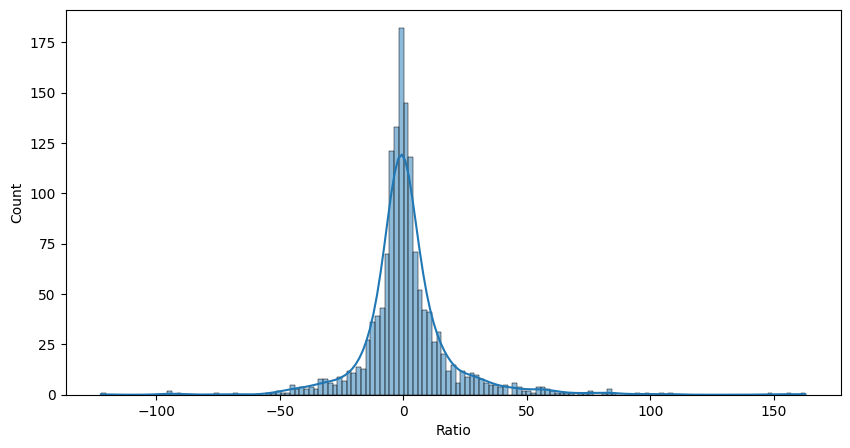

1.5482819199191298 19.430724697567022 162.89453667386778 -122.48557716326833
                                  Open         High          Low        Close  \
Date                                                                            
2024-03-14 00:00:00+05:30  3053.949951  3177.899902  3017.050049  3165.949951   
2024-03-15 00:00:00+05:30  3164.949951  3182.550049  3006.000000  3099.100098   
2024-03-18 00:00:00+05:30  3138.000000  3184.000000  3105.399902  3121.949951   
2024-03-19 00:00:00+05:30  3111.750000  3144.399902  3034.350098  3058.899902   
2024-03-20 00:00:00+05:30  3074.000000  3080.000000  2913.600098  2980.500000   
2024-03-21 00:00:00+05:30  3024.000000  3128.449951  3020.000000  3121.350098   
2024-03-22 00:00:00+05:30  3114.050049  3209.899902  3085.000000  3170.800049   
2024-03-26 00:00:00+05:30  3193.000000  3305.000000  3180.000000  3300.800049   
2024-03-27 00:00:00+05:30  3317.000000  3324.899902  3245.000000  3281.050049   
2024-03-28 00:00:00+05:30  3291.

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['Ratio'],kde=True)
plt.show()

print(df['Ratio'].mean(),df['Ratio'].std(),df['Ratio'].max(),df['Ratio'].min())
print(df.tail(10))

## LETS DO SOME ANALYSIS

mean % chaneg is 0.1725346986279822, and std dev is2.34241849512946


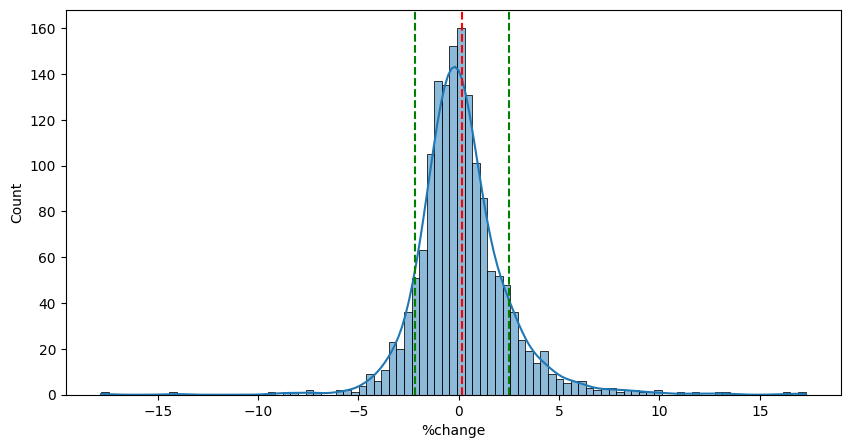

4724.05

In [ ]:
n=15


mean,std,req_data=cal_ploting_mean_std_returns(historical_stock_data)
current_price=get_last_traded_price(access_token_value,instrument_key,symbol)
current_price


In [ ]:
pos_change_in_next_ndays,neg_change_in_next_ndays,lower_range_l,upper_range_l=linear_range(n,mean,std,current_price)
print("according to linear asumption")
print(f"till expiry stock can move from {lower_range_l} to {upper_range_l} in {n} days")
print(f"this means a move anywhere bw  {neg_change_in_next_ndays} and  {pos_change_in_next_ndays} is possible with 68% probability" )

print("according to compunded growth")
pos_change_in_next_ndays,neg_change_in_next_ndays,lower_range_e,upper_range_e=exponential_range(n,mean,std,current_price)
print(f"till expiry stock can move from {lower_range_e} to {upper_range_e} in {n} days")
print(f"this means a move anywhere bw  {neg_change_in_next_ndays} and  {pos_change_in_next_ndays} is possible with 68% probability" )

according to linear asumption
till expiry stock can move from 4417.736582297183 to 5274.8821806188735 in 15 days
this means a move anywhere bw  -6.484127342064905 and  11.66016830090437 is possible with 68% probability
according to compunded growth
till expiry stock can move from 4427.456249583749 to 5308.28159192633 in 15 days
this means a move anywhere bw  -0.06278378730459067 and  0.12367176298437355 is possible with 68% probability


In [ ]:

no_of_days_to_simulate=15
no_of_simulation_to_run=100000
lower_bound_m,upper_bound_m=monte_carlo_simulation(current_price,mean,std,no_of_days_to_simulate,no_of_simulation_to_run)
print(f"according to monte carlo simulation which tested {no_of_simulation_to_run} random paths where each path was of {no_of_days_to_simulate} days")
print(f"generated a range bw {lower_bound_m} and {upper_bound_m} that covers 5th to 95th percentile of all path possible")
print("\n")

lower_bound_g,upper_bound_g=geometric_brownian_motion_simulation(current_price,mean,std,no_of_days_to_simulate,no_of_simulation_to_run)
print(f"according to monte carlo simulation which tested {no_of_simulation_to_run} random paths where each path was of {no_of_days_to_simulate} days")
print(f"generated a range bw {lower_bound_g} and {upper_bound_g} that covers 5th to 95th percentile of all path possible")
print("\n")


according to monte carlo simulation which tested 100000 random paths where each path was of 15 days
generated a range bw 4157.933613759334 and 5597.414236591899 that covers 5th to 95th percentile of all path possible




according to monte carlo simulation which tested 100000 random paths where each path was of 15 days
generated a range bw 4155.985174495087 and 5608.030119055625 that covers 5th to 95th percentile of all path possible




In [ ]:
#finding range for it
df_risk_reward=calculate_all_possible_spread_and_max_loss(new_data_frame,my_strike_list)
print(df_risk_reward.columns)
from google.colab import sheets
df_risk_reward['max_loss']=df_risk_reward['loss']*300
df_filtered=df_risk_reward[(df_risk_reward['max_loss']<=6000) & (df_risk_reward['strike_2']>=upper_range_l-100) & (df_risk_reward['strike_2']<=upper_bound_m)]

sheet = sheets.InteractiveSheet(df=df_filtered)

#rules for strike selection are
# 1--strike2 should be bw high of (upper range-linear-1 strike less) & (high of monte carlo (strict here))
# 2--strike1 should be greater than monte carlo high and as faar as possible from it
# 3--r/r should be max
# 4--out of all options available after step1 and step2 find those strike2 that are near to upper range of linear (prefer this step4 than step5beacuse its bull call and its the main of strategy and bear call was just to hedge my downside)
# 5--out of all options available after step1 and step2 and step4 find those strike1 that are far from monte carlo simulation
# 6--out of all options available after step1 and step2 and step4 and step5
# 7--max loss should be less than eqqual to 5000

Index(['reward', 'loss', 'profit', 'strike_1', 'strike_2'], dtype='object')
https://docs.google.com/spreadsheets/d/1mPx1DRN6VJC56ovTsbPNApkkuz4X2lzSOVyySQhjPyY#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


        expiry  strike_price instrument_key    ltp  volume         oi  \
13  2024-08-29        5200.0  NSE_FO|107336  47.00  245400   719100.0   
14  2024-08-29        5300.0  NSE_FO|107340  35.55  118500   416100.0   
15  2024-08-29        5400.0  NSE_FO|107347  27.30   90000   443700.0   
16  2024-08-29        5500.0  NSE_FO|107351  21.35  177000  1042800.0   
17  2024-08-29        5600.0  NSE_FO|107355  18.00   70200   360600.0   

    close_price  bid_price  bid_qty  ask_price  ask_qty    prev_oi    vega  \
13        49.30      47.30      900      47.85      300   690300.0  3.0652   
14        37.65      35.80      300      36.25      300   406200.0  2.6221   
15        29.30      27.55      300      27.90      600   436500.0  2.2278   
16        23.75      22.20      300      22.50      300  1046700.0  1.8894   
17        19.35      18.20      300      18.45      900   357600.0  1.6501   

     theta   gamma   delta     iv  
13 -3.0432  0.0006  0.1874  42.05  
14 -2.6637  0.0005  

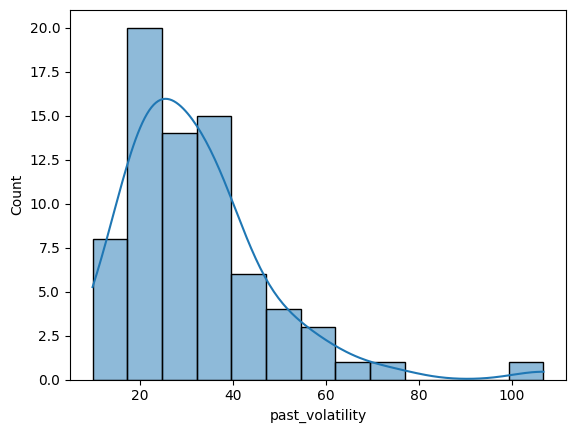

mean annualised volatility of 15 days before expiry  is 31.931656647669314and std is 15.744535588452022


In [ ]:
# current_iv_bw my strikes is
my_sel_strike1=[5200,5300,5400,5500,5600]

iv_of_strike1=df_call[df_call['strike_price'].isin(my_sel_strike1)]


print(iv_of_strike1)
print("\n")


no_of_days_before_expiry=15
plotting_volatility_cone(req_data,no_of_days_before_expiry)


## FINDING STOCKS WITH VOLATILITY LOWER/HIGHER THAN THEIR STD DEV

In [51]:
no_of_days_before_expiry=13
df_past_volatilty_range=pd.DataFrame(columns=['SYMBOL','MIN','-2STD','-1STD','MEAN','+1STD','+2STD','MAX'])
for index,stocks in enumerate(df_only_options_stock['Symbol']):
  if stocks=='L&TFH':
     continue
  elif stocks=='MCDOWELL-N':
     data=yf.download(tickers='UBL.BO',period='max',interval='1d')
  else:
     data=yf.download(tickers=f'{stocks}.NS',period='max',interval='1d')

  historical_stock_data=data['Adj Close']
  mean,std,req_data=cal_ploting_mean_std_returns(historical_stock_data)
  list_range_past_volatility=plotting_volatility_cone(req_data,no_of_days_before_expiry)
  list_range_past_volatility.insert(0,stocks);
  df_past_volatilty_range.loc[len(df_past_volatilty_range)]=list_range_past_volatility
print(df_past_volatilty_range)

[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.1662430045691859, and std dev is2.752935211248694


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.20058691988603, and std dev is6.365245184189876


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.11322887742328629, and std dev is2.8799157384777088


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.02386480384826557, and std dev is2.469290452007877


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.05763771330204895, and std dev is2.605364013834361


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.07619787797696305, and std dev is2.010236363110331


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.3221101609971059, and std dev is15.678013168482096


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.08848680038996594, and std dev is2.673403737736572


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.08341595406231798, and std dev is1.647179642791236


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.1916518899042768, and std dev is9.141062161459892


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.11183777767581361, and std dev is2.2162571709361787


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.11506453887059341, and std dev is2.6335080079452684


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.14529984351375155, and std dev is2.9826603427567564


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.10863120158617327, and std dev is1.6583081979381835


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.17675916724888238, and std dev is2.6108283301245785


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.14240583102571558, and std dev is2.61155673253962


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.07660164852952296, and std dev is2.478112117298313


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.14096853311856292, and std dev is3.5001666623134158


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.13489712322659642, and std dev is2.760423894637823


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.10706085930815591, and std dev is1.9876902422607643


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.08819335960435315, and std dev is2.7916596852003503


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.33456509091704684, and std dev is13.740150617798225


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.10793919022621705, and std dev is2.498801986257234


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.32294561741811423, and std dev is12.467195631715276


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is -0.005687071155725737, and std dev is3.124202348461848


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.10176207301658019, and std dev is2.7917953207847406


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.11343320959611353, and std dev is2.5615589383623463


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.6901171137301206, and std dev is43.276479449341714


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.16819784692227205, and std dev is2.892697627090838


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.11403192085652987, and std dev is3.020307377895283


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.1105227616318357, and std dev is2.3016462723820523


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.12817756320672155, and std dev is3.796353701157706


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.15293512543532428, and std dev is7.492865711533749


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.10406615335266162, and std dev is1.8263201360226404


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.1560354576002998, and std dev is6.513249858986311


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.10996475898337607, and std dev is1.8846749653428416


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.14505315924830872, and std dev is3.1143906233716874


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.15744220539630638, and std dev is6.432865020022182


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.1315219042674436, and std dev is2.5244864358967196


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.12436511758598791, and std dev is2.9158158115177097


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.20184020009802658, and std dev is6.173604186652488


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.7454130387557856, and std dev is28.49915312684796


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.05873434004120654, and std dev is1.8754454342085067


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.12772377046420538, and std dev is2.8327710845603957


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.0903713864453104, and std dev is1.604741222429596


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.1164025511562968, and std dev is3.646394753478749


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.13278427633146167, and std dev is2.5881899670552273


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.08198289424836354, and std dev is2.019139519565275


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.11545280236469874, and std dev is2.293151148835813


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.11506788672061177, and std dev is2.1337229391361694


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.11104888749204617, and std dev is2.4168672693177604


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.061561813184721016, and std dev is2.3513167419707584


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.1866367691594517, and std dev is2.490947561312099


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.10187482318569668, and std dev is3.412281282422791


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.14929350159579854, and std dev is2.312979694497721


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.20823807504918798, and std dev is2.4995059339918346


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.0646652879608507, and std dev is3.211735642576566


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.1006033153661587, and std dev is2.5791106965754693


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.27579310393178047, and std dev is11.108349404661771


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.10740934513832447, and std dev is3.1308311800977733


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.11884700959914347, and std dev is2.264040973638654


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.09770157444095329, and std dev is2.7056067365031544


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.13364346628849172, and std dev is5.811902340038119


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.7845086978197071, and std dev is28.078773855724805


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.08507050572972445, and std dev is3.073398009850419


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.10214390476861533, and std dev is2.6420476525309327


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.12350332704763381, and std dev is2.054762546082589


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.09550553519590384, and std dev is2.276094245539538


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.12962274362230128, and std dev is2.728279155425739


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.1813354817164931, and std dev is7.745166858135199


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.09392104791841585, and std dev is2.0584006972081594


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.1721808880514634, and std dev is2.3426341239483808


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.1629566795641688, and std dev is2.5002505749274673


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.11537822805679339, and std dev is2.3873223001257218


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.0839110896529282, and std dev is2.0574774770905346


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.113412269854785, and std dev is2.1046865463348188


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.06326466348374607, and std dev is1.9296170001868782


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.08378505627773483, and std dev is1.986319195418229


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.06780983801877752, and std dev is2.6393959544671772


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.04459328377334649, and std dev is3.122794809999537


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.15598380062448847, and std dev is7.358348130748195


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.07721220457640887, and std dev is1.8210190437477503


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.06295553655729437, and std dev is3.490643692557805


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.1055461699273408, and std dev is2.4206988666052154


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.0838409304802131, and std dev is1.9076597268205995


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.07160365410863512, and std dev is2.145316870114564


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.040672878748239924, and std dev is3.696132570229111


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.07739019262652548, and std dev is2.8599005701664773


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.032161411366263395, and std dev is2.3955551754853093


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.10763149170667803, and std dev is2.299061975039845


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.09313913213109679, and std dev is2.2555607509795217


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.09809865122656153, and std dev is2.296581876196192


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.0631368544395808, and std dev is3.2922475449124247


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.2376977318356273, and std dev is5.306812457910815


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.10545419833610942, and std dev is2.4173158284550325


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.12656147394067266, and std dev is2.9265852801241725


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.07399280786003364, and std dev is2.531066685911136


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.14177403430849664, and std dev is2.3905632672679316


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.6619368934431751, and std dev is19.143374423513222


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.11306775480825486, and std dev is2.861182107829848


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.1907335150140529, and std dev is2.58031514734206


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.09070297290752133, and std dev is2.026630511675706


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.15155581372653532, and std dev is3.2941534449532197


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.10666781816607214, and std dev is2.3524808519893963


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.13412792098833717, and std dev is2.967553983595604


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.12106314286547339, and std dev is2.4847563596084794


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.2622453233947713, and std dev is8.102497254680602


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.08869112700911133, and std dev is2.126021563268809


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.10690418461681121, and std dev is2.210767121924732


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.11051727754221831, and std dev is2.6284999052507008


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.12129436122007854, and std dev is2.66626604312854


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.13095362811130903, and std dev is2.0780443814328664


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.11971237688062213, and std dev is2.2767293333868173


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.14385489439423685, and std dev is3.094307371385496


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.18058049888365477, and std dev is5.223785052452785


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.09115572025483105, and std dev is2.585918107862685


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.11142200048738278, and std dev is3.0822945875254084


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.11111522444668968, and std dev is2.0368773065183134


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.10698879366807086, and std dev is2.07798308898164


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.13572638635211115, and std dev is2.889982729224841


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.08119160314617342, and std dev is2.629310934901014


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.09081958422436089, and std dev is2.465445687129486


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.14099948170905136, and std dev is5.72444237170695


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.09196424365201324, and std dev is2.0156735397403054


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.23884893354277068, and std dev is7.641152393942617


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.10605518812378885, and std dev is2.441858988392805


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.11656792549537359, and std dev is2.1625697559007473


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.1134688388630576, and std dev is2.498988296541668


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.11039941860026102, and std dev is2.909615724326822


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.11990128604055722, and std dev is2.4760276235292635


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.14177969939138046, and std dev is2.633062068490969


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.044070633694351824, and std dev is1.394859023477383


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.053114020715149986, and std dev is2.6005503183271284


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.06929966539791134, and std dev is1.8611170383332627


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.08554765533530302, and std dev is2.4279235918418833


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.10508366466263067, and std dev is2.287045499418076


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.1101146946893675, and std dev is3.3405700338976057


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.14703557488829183, and std dev is2.250256833769915


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.09625517713770619, and std dev is2.527122856359184


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.13483137466721107, and std dev is2.074912230931659


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.11428564523255368, and std dev is2.330873816213372


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.11213151609415113, and std dev is2.7293675190833366


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.2785907764544795, and std dev is8.619722348897922


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.1549674048399066, and std dev is2.251349625283188


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.0903230596420205, and std dev is2.7967624903163713


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.20619627192201823, and std dev is2.290952133360491


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.07307153873732804, and std dev is1.84398234843781


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is -0.03223501742375012, and std dev is1.6517404643845746


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.09857585416729416, and std dev is2.2354929238401686


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.03108486579228401, and std dev is2.995994334581656


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.12245348521934864, and std dev is2.5934914968463043


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.11996032491254298, and std dev is2.9712152703550943


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.08436556879484682, and std dev is3.339088793094358


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.026166578301887258, and std dev is2.015412349312325


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.06924901862612377, and std dev is1.7555068549404156


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.08633905570938447, and std dev is2.36923914764289


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.1445590881270869, and std dev is2.313086196391871


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.1488394786582788, and std dev is2.752321780443423


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.11965087985167107, and std dev is2.379724012732919


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.22095541496236643, and std dev is6.161439943264905


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.12554978593751334, and std dev is2.307438049341267


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.06823964902047196, and std dev is2.7802734633210227


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.09439761027956355, and std dev is1.8809908683535832


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.09667492754917544, and std dev is2.4415557406258497


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.10318667923976028, and std dev is2.755263229789571


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.08491208318117946, and std dev is2.258648913467038


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.09094382510763302, and std dev is2.8889040416961738


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.09079325818005532, and std dev is2.5149371520215613


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 1.6998522463657684, and std dev is40.04050802629481


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.13613508442197403, and std dev is3.657861179755576


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.08834210183749493, and std dev is2.371203602099566


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.13014222685696397, and std dev is2.8494244120885543


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.13149823611584818, and std dev is2.165597565166614


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.29888513147000245, and std dev is13.204245863309572


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.13275733260674846, and std dev is2.7985772429972875


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.09727520658279001, and std dev is2.562817771165459


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.09990610800563204, and std dev is2.2634226940694346


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.10387790218389958, and std dev is2.8545941643281276


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.1550680538526804, and std dev is4.315033816764595


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.3365030578218559, and std dev is12.894488289624164


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.18549359409323682, and std dev is6.097631270339074


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.0735077329015506, and std dev is3.090404599738746


[*********************100%%**********************]  1 of 1 completed


mean % chaneg is 0.10308895152417263, and std dev is2.1983928517732316
         SYMBOL        MIN       -2STD       -1STD       MEAN       +1STD  \
0      AARTIIND   5.465978  -11.730343   12.394306  36.518956   60.643605   
1           ABB   7.729846 -196.716440  -79.910128  36.896183  153.702495   
2    ABBOTINDIA   0.000000  -13.622090    0.852248  15.326585   29.800923   
3     ABCAPITAL  12.551156    5.195299   19.527988  33.860677   48.193366   
4         ABFRL  16.551393    7.248824   21.510404  35.771984   50.033565   
..          ...        ...         ...         ...        ...         ...   
178        VEDL   0.000000  -57.067736   -3.857850  49.352036  102.561923   
179      VOLTAS  10.785728 -439.387326 -192.975125  53.437075  299.849275   
180       WIPRO   8.400984 -176.075229  -66.935727  42.203776  151.343279   
181        ZEEL   9.659270  -15.857712   12.383255  40.624222   68.865188   
182   ZYDUSLIFE   7.186989   -5.062955   12.329502  29.721960   47.114417   

    

In [59]:
from google.colab import drive
drive.mount('/content/drive')
df_past_volatilty_range.to_csv('/content/drive/MyDrive/MY_ONLINE_DATA_NEEDED_FILES/VOLATILITY_NDAYS_BEFORE_EXPIRY_FOR_ALL_STOCKS/13days.csv', index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [92]:
list_atm_iv=[]
rejection_list=[]
for symbol in df_only_options_stock['Symbol']:

    instrument_key=df[df['Symbol']==symbol]['instrument_key'].values[0]
    data=import_option_chain_data(instrument_key,access_token_value)
    df_call,df_general=format_option_chain_data_into_dataframe(data)
    if df_call.empty:

      rejection_list.append(symbol)
      continue

    if symbol=='L&TFH':
      continue
    spot_price=df_general['underlying_spot_price'].values[0]
    #find atm strike price
    df_call['diff']=abs(df_call['strike_price']-spot_price)
    row_with_min__diif=df_call.loc[df_call['diff'].idxmin()]
    list_atm_iv.append(row_with_min__diif['iv'])



list_atm_iv

{'status': 'success', 'data': [{'expiry': '2024-08-29', 'pcr': 211.0, 'strike_price': 600.0, 'underlying_key': 'NSE_EQ|INE769A01020', 'underlying_spot_price': 746.15, 'call_options': {'instrument_key': 'NSE_FO|75541', 'market_data': {'ltp': 157.85, 'volume': 1000, 'oi': 1000.0, 'close_price': 88.25, 'bid_price': 146.6, 'bid_qty': 2000, 'ask_price': 149.65, 'ask_qty': 1000, 'prev_oi': 1000.0}, 'option_greeks': {'vega': 0.3413, 'theta': -0.7308, 'gamma': 0.0013, 'delta': 0.8847, 'iv': 85.94}}, 'put_options': {'instrument_key': 'NSE_FO|75542', 'market_data': {'ltp': 0.7, 'volume': 64000, 'oi': 211000.0, 'close_price': 0.8, 'bid_price': 0.7, 'bid_qty': 1000, 'ask_price': 0.8, 'ask_qty': 1000, 'prev_oi': 209000.0}, 'option_greeks': {'vega': 0.0897, 'theta': -0.107, 'gamma': 0.0006, 'delta': -0.0213, 'iv': 47.85}}}, {'expiry': '2024-08-29', 'strike_price': 610.0, 'underlying_key': 'NSE_EQ|INE769A01020', 'underlying_spot_price': 746.15, 'call_options': {'instrument_key': 'NSE_FO|89729', 'mark

[37.84,
 34.36,
 24.44,
 32.71,
 17.58,
 26.61,
 28.93,
 26.49,
 34.99,
 26.0,
 28.52,
 29.3,
 25.88,
 21.0,
 29.66,
 44.02,
 27.83,
 31.98,
 21.12,
 22.37,
 21.97,
 22.09,
 38.24,
 37.35,
 33.2,
 29.3,
 23.62,
 34.18,
 26.73,
 29.05,
 18.86,
 38.82,
 31.74,
 24.57,
 30.27,
 18.07,
 0.0,
 31.01,
 37.48,
 30.03,
 19.53,
 26.49,
 31.22,
 20.63,
 29.17,
 28.99,
 29.05,
 31.25,
 29.39,
 22.58,
 26.86,
 31.13,
 23.79,
 33.07,
 27.47,
 20.1,
 25.04,
 28.29,
 29.54,
 24.9,
 32.23,
 35.4,
 40.04,
 95.46,
 23.93,
 33.54,
 21.73,
 26.76,
 29.66,
 39.2,
 22.09,
 20.69,
 26.34,
 18.07,
 23.19,
 29.6,
 32.47,
 37.6,
 33.69,
 14.77,
 19.9,
 27.34,
 29.3,
 50.78,
 26.37,
 26.37,
 37.11,
 31.25,
 25.88,
 12.7,
 36.96,
 24.08,
 24.41,
 28.08,
 20.26,
 28.81,
 34.12,
 34.06,
 18.55,
 28.08,
 35.1,
 25.27,
 34.06,
 18.31,
 31.62,
 29.54,
 35.52,
 20.9,
 27.8,
 28.43,
 24.29,
 24.41,
 28.81,
 30.27,
 22.83,
 22.32,
 22.22,
 35.8,
 41.75,
 40.77,
 30.15,
 38.57,
 27.92,
 23.29,
 33.26,
 41.02,
 34.93,
 26.

In [98]:
print(rejection_list)
df_past_iv=pd.read_csv('/content/drive/MyDrive/MY_ONLINE_DATA_NEEDED_FILES/VOLATILITY_NDAYS_BEFORE_EXPIRY_FOR_ALL_STOCKS/13days.csv')
df_past_iv.drop(index=df_past_iv[df_past_iv['SYMBOL'].isin(rejection_list)].index,inplace=True)
df_past_iv['ATM_IV']=list_atm_iv

# print(df_past_iv[df_past_iv['ATM_IV']<df_past_iv['-2STD']])
# print(df_past_iv[df_past_iv['ATM_IV']>df_past_iv['+2STD']])
df_past_iv.to_csv('/content/drive/MyDrive/MY_ONLINE_DATA_NEEDED_FILES/VOLATILITY_NDAYS_BEFORE_EXPIRY_FOR_ALL_STOCKS/list_of_past_iv_current_atm_iv_of_all_stocks')

['CANBK', 'DELTACORP', 'IBULHSGFIN', 'PERSISTENT', 'ZEEL']
